In [1]:
%%HTML
<h1><p style="color:green;">Welcome to this project on Heart Attack Analysis & Prediction</p></h1>

In [ ]:
%%HTML
<h3 style="color:green;">About Dataset</h3>

In [43]:
%%HTML
<p> As heart attacks in younger people are becoming more common
I was interested in trying to predict whether on not someone will have heart disease based
on serveral factors related to their current health and other heart realted issues. I've chosen the dataset 
from Kaggle (<b>https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset</b>).
</P>

In [6]:
%%HTML
<h3 <p style ="color:green;">Data Analysis </p></h3>

In [16]:
%%HTML

<p>There are a couple columns that are not self-explanatory so here is some more information.</p>

<p><b>age:</b> The person's age in years</p>

<p><b>sex:</b> The person's sex (1 = male, 0 = female)</p>

<p><b>cp:</b> The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, 
Value 3: non-anginal pain, Value 4: asymptomatic)</p>

<p><b>trtbps:</b> The person's resting blood pressure (in mm Hg)</p>

<p><b>chol:</b> The person's cholestoral in mg/dl fetched via BMI sensor</p>

<p><b>fbs:</b> The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)</p>

<p><b>restecg:</b> Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality,
2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)</p>

<p><b>thalachh:</b> The person's maximum heart rate achieved</p>

<p><b>oldpeak:</b> ST depression induced by exercise relative to rest</p>

<p><b>slp:</b> the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)</p>

<p><b>caa:</b> The number of major vessels (0-3)</p>

<p><b>thall:</b> A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously
Value 1: fixed defect (no blood flow in some part of the heart) Value 2: normal blood flow 
Value 3: reversible defect (a blood flow is observed but it is not normal)</p>

<p><b>exng:</b> Exercise induced angina (1 = yes; 0 = no)</p>

<p><b>target:</b> Heart disease (0 = no, 1 = yes)</p>
                                                    

In [36]:
#importing important libraries 

# 1-run
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import sklearn as sk
import seaborn as sns

In [29]:
# 2-run
os.getcwd()

'C:\\Users\\DELL'

In [49]:
#change working dir
# 3-run
os.chdir("C:\\Users\\DELL\\HeartDiseasAnalysis")

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'C:\\Users\\DELL\\HeartDiseasAnalysis'

In [50]:
%%HTML
<h3>Loading the dataset</h3>

In [52]:
#upload Dataset
# 4-run
df=pd.read_csv("C:\\Users\\DELL\\Dataset.csv")

In [53]:
# 5-run
os.getcwd()

'C:\\Users\\DELL'

In [54]:
%%HTML
<h3>Data Analysis </h3>
<p>Showing the full Dataframe</p>

In [55]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [58]:
df.shape

(303, 14)

In [56]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [59]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
df.head(40)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [64]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [65]:
df.tail(40)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
263,63,0,0,108,269,0,1,169,1,1.8,1,2,2,0
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2,0
265,66,1,0,112,212,0,0,132,1,0.1,2,1,2,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
267,49,1,2,118,149,0,0,126,0,0.8,2,3,2,0
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [66]:
pwd

'C:\\Users\\DELL'

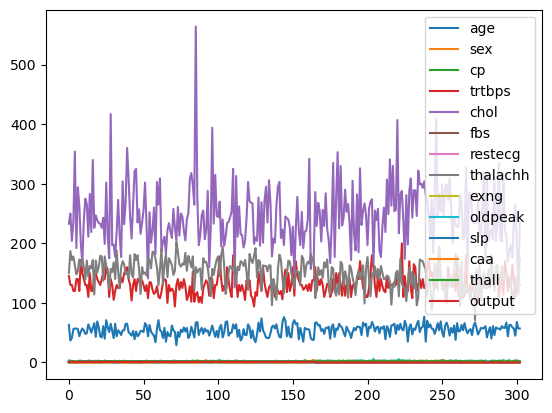

AttributeError: 'OutStream' object has no attribute 'buffer'

In [67]:
df.plot()
plt.show()

#Two lines to make our compiler able to draw:
plt.savefig(sys.stdout.buffer)
sys.stdout.flush()

In [68]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [69]:
df.drop_duplicates(inplace=True)